<center>

# StreamOracle : Predicting content quality and popularity for streaming services
    
</center>

<center>

#### Capstone Project by Arjun Lokur
    
</center>

### Introduction to Project

This capstone project aims to predict the quality and popularity for a movie or TV show, based on inputting key features incuding who's starring in it, a brief summary of the plot, the genres etc. The intent being to help a streaming platform to decide whether it would be worth it to greenlight a new piece of content, or acquire one to host on their platform. The quality and popularity here being measured by IMDB rating, and number of IMDB votes respectively.

The reason this is important is that streaming companies are under a lot of financial pressure in 2023. Netflix for example hit it's all time market cap high in Nov 2021 (\$314 Bn) on the heels of the pandemic-related lockdowns but has since come down to \\$145 Bn. And in their quarterly reports have mentioned subsciber loss/plateuing and even plans to launch an ad-supported tier. Part of the reason for this is more competition, with a lot of streamers entering a now crowded space, and part of the reason is that companies overestimated the importance of pandemic related trends.

Whatever the reasons, streaming companies now have a much smaller margin for error in their selection of projects. Whereas in the past they could afford a flop show or movie, their appetite for that has reduced significantly. This project aims to help them make better decisions.

### Introduction to Notebook 1

This notebook's purpose is for loading in the data (from multiple datasets), basic cleaning and EDA, visualization and feature engineering. At the end of the notebook, we'll save the processed dataframe to a csv file which will then be read into different notebooks for modeling.


## Table of Contents

[Data Dictionary](#Data_Dictionary)


[Part 1 - Cleaning, EDA and Preprocessing](#1)

[Part 2 - Feature Engineering](#2.) <br>
- [a. Extracting actor value information from the Credits table](#2)
- [a. Adding in awards information](#2.b)
- [b. Genres](#2.c)
- [c. Titles](#2.d)
- [d. Description](#2.e)
- [e. Seasons](#2.f)
- [f. Type (Movie/Show)](#2.g)
- [g. Production Countries](#2.h)
<br>

[Part 3 - Joining the datasets and saving processed dataframe for modeling](#3)

[Conclusion](#Conclusion_)

## Data Dictionary

I've started out with 8 different datasets. This is because I was able to get the data for 4 different streaming services:
1) Netflix <br>
2) Amazon Prime Video <br>
3) HBO Max <br>
4) Disney Plus <br>

And then each service has 2 datasets each, which is the titles (movie/TV show) on each streaming service, and then the credits for each of those titles.

I'm initially going to combine all the titles into a dataset called **all_titles** and all the credits into one called 
**all_credits**. The data dictionary for these 2 datasets is as follows:

<center>

### all_titles

</center>

|          Feature Name          |                                                    Explanation                                                    |
|:------------------------------:|:-----------------------------------------------------------------------------------------------------------------:|
|               id               | This is the unique identifier for that content title.<br>  This is the column on which we can join the credits table. |
|              title             |                                              The name of the content                                              |
|              type              |                                         Whether it's a movie or a TV show                                         |
|           description          |            A short description about this movie/TV show.<br>  Essentially a plot summary without spoilers.            |
|          release_year          |                                         The year this content was released                                        |
|        age_certification       |                      The age certification, ranging from G (General Audience) to R (R-rated)                      |
|             runtime            |                             The length of the movie in minutes (also knows as runtime)                            |
|      production_countries      |                                    The country or countries it was produced in                                    |
|             seasons            |                                       How many seasons it has (for TV shows)                                      |
|             imdb_id            |                                   Another identifier column, it's the id on IMDB                                  |
|           imdb_score           |            The rating on IMDB. This is one of our target <br>columns, and a proxy for the content quality.           |
|           imdb_votes           |             Our other target columns - How many people <br> voted for it on IMDB. A proxy for popularity.             |
| tmdb_popularity and tmdb_score |            Similar metrics for another ratings platform TMDB.<br>  Not important as I'll be dropping these.           |
|            platform            |           Which platform the content is coming from, as<br> I'm  combining content for 4 different platforms          |

<center>
    
### all_credits
    
</center>

|          Feature Name          |                                                    Explanation                                                    |
|:------------------------------:|:-----------------------------------------------------------------------------------------------------------------:|
|               person_id               | Unique identifier for that person (actor or director)
|              id             |                                              Unique id for the content title in question<br>This links the all_credits table to the all_titles table                                          |
|              name             |                                         The name of the actor or director                                         |
|           character          |            The name of the character they are playing (if the person is an actor)          |
|          role          |                                         Whether they are an Actor or a Director                                       |


As a later step, I was looking to strengthen the data with proxy information to determine the quality of the director, which I couldn't gather from this dataset. To that end, I gathered information on awards wins and nominations (Oscars, Emmys) and I added it in for the actors as well. That is not a part of this notebook (I've included a seperate one), but I read in that data later in this notebook to create the final dataframe for modeling.

### 1

## Cleaning, EDA and Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the data for Netflix first, with the titles and 
#the credits (meaning the actors and director) being in seperate csv files

netflix_titles = pd.read_csv('data/netflix_titles.csv')

In [3]:
#Since we're joining multiple platforms into one dataframe

netflix_titles['platform'] = 'netflix'

In [6]:
netflix_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,netflix
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,netflix
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,netflix
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,netflix
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600,netflix


In [7]:
netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
 15  platform             

I'm going to combine all the streaming titles into one csv file before cleaning it.

In [8]:
#now importing the credits for netflix

netflix_credits = pd.read_csv('data/netflix_credits.csv')

In [9]:
netflix_credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


 Note that all of these actors (and more) are just for one movie - the id 'tm84618' refers to the movie Taxi Driver which is the first row in our netflix_titles table.

In [10]:
netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
 15  platform             

In [11]:
#Checking who the top actors/directors are on Netflix by number of movies

netflix_credits.groupby(netflix_credits['name'])["id"].count().sort_values(ascending=False).reset_index().head()

,name,id
0,Boman Irani,25
1,Kareena Kapoor Khan,25
2,Shah Rukh Khan,23
3,Takahiro Sakurai,21
4,Raúl Campos,20


In [4]:
#Now creating the dataframes for all the other streaming sevices one by one
#First up HBOmax

hbo_titles = pd.read_csv('data/hbo_titles.csv')
hbo_credits = pd.read_csv('data/hbo_credits.csv')
hbo_titles['platform'] = 'hbo'

In [5]:
#Disneyplus
disney_titles = pd.read_csv('data/disney_titles.csv')
disney_credits = pd.read_csv('data/disney_credits.csv')
disney_titles['platform'] = 'disney'

In [6]:
#Amazon Prime video
prime_titles = pd.read_csv('data/prime_titles.csv')
prime_credits = pd.read_csv('data/prime_credits.csv')
prime_titles['platform'] = 'prime'

In [7]:
#Combining all the titles into one dataframe, and all the credits into one dataframe

all_titles = pd.concat([netflix_titles,hbo_titles,disney_titles,prime_titles])

In [8]:
all_titles[all_titles['title'] == "You've Got Mail"]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
113,tm56574,You've Got Mail,MOVIE,"Book superstore magnate, Joe Fox and independe...",1998,PG,119,"['comedy', 'romance', 'drama']",['US'],NaN,tt0128853,6.7,211635.0,21.724,6.643,netflix
742,tm56574,You've Got Mail,MOVIE,"Book superstore magnate, Joe Fox and independe...",1998,PG,119,"['romance', 'drama', 'comedy']",['US'],NaN,tt0128853,6.7,209258.0,15.015,6.600,hbo


In [16]:
all_credits = pd.concat([netflix_credits,hbo_credits,disney_credits,prime_credits])

In [17]:
#Checking for duplicates in all_credits

all_credits.duplicated().sum()

4524

The reason that all_credits has duplicates is that a few titles on all_titles are being repeated, because the some movie/TV show is sometimes available on multiple platforms. 

This will complicate things later during feature engineering, so let's drop the duplicates, both on all_titles and all_credits.

In [18]:
all_titles[all_titles['id'].duplicated()].head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
220,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0,14.745,7.5,hbo
249,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['drama', 'crime', 'action']",['US'],NaN,tt0061418,7.7,111189.0,15.309,7.5,hbo
252,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,145,"['action', 'war']","['US', 'GB']",NaN,tt0061578,7.7,71921.0,17.718,7.6,hbo
531,tm155787,GoodFellas,MOVIE,"The true story of Henry Hill, a half-Irish, ha...",1990,R,146,"['drama', 'crime']",['US'],NaN,tt0099685,8.7,1113695.0,31.153,8.5,hbo
537,tm138875,When Harry Met Sally...,MOVIE,"During their travel from Chicago to New York, ...",1989,R,96,"['romance', 'comedy', 'drama']",['US'],NaN,tt0098635,7.7,212913.0,16.005,7.4,hbo


So there are 237 duplicates in all_titles.

In [19]:
#Dropping duplicates for all_titles

all_titles = all_titles.drop_duplicates(subset='id', keep='first')

In [20]:
#Checking to see if it worked

all_titles.duplicated(subset='id').sum()

0

In [21]:
#Dropping duplicates for all_credits

all_credits.drop_duplicates(inplace=True)

In [22]:
all_credits.duplicated().sum()

0

Let's now check for null values in our dataframes

In [23]:
#Checking for the null values in ther titles dataframe

all_titles.isna().sum()/len(all_titles) * 100

id                       0.000000
title                    0.004923
type                     0.000000
description              0.763058
release_year             0.000000
age_certification       52.035642
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 77.551322
imdb_id                  8.782553
imdb_score              11.248954
imdb_votes              11.445872
tmdb_popularity          3.342687
tmdb_score              13.577512
platform                 0.000000
dtype: float64

We need the IMDB score and votes as this is going to be our target column. That 11% of the data for these rows is missing isn't ideal, but I'm choosing to drop these rows instead of scraping to get the values from IMDB, which may take up a lot of time.

First let's make sure that it's the same rows that have both IMDB score and votes missing.

In [24]:
len(all_titles[all_titles['imdb_score'].isna() & all_titles['imdb_votes'].isna()])/len(all_titles) * 100

11.248953871904693

It's the same rows, and there may be some extra rows that have the imdb_votes missing. However, as a last option before I drop it, let's check if the tmdb scores and popularity columns have anything useful. TMDB is another website that is like an alternative to IMDB, it also scores movies and TV shows on quality and popularity, based on user votes.

In [25]:
all_titles[['title','tmdb_popularity']].sort_values(by = 'tmdb_popularity',ascending=False).head(20)

,title,tmdb_popularity
1364,Moon Knight,9323.832
2974,The Batman,4447.894
1368,Turning Red,2331.811
907,Doctor Strange,2286.312
4707,Incantation,2274.044
1123,Stranger Things,2226.231
4702,The Sea Beast,1723.363
4714,Valley of the Dead,1668.296
4696,The Man from Toronto,1439.906
8934,All the Old Knives,1437.906


Something seems off here. Out of all the movies and TV shows that exist on streaming, these are the most popular? The no. 1, Moon Knight was a decidedly mixed bag TV show offering from Marvel Studios that had a lukewarm response from viewers. And are movies like 'The Batman' and 'Doctor Strange' really more popular than say 'The Dark Knight' and 'Titanic'? Let's look at the TMDB scores next.

In [26]:
all_titles[['title','tmdb_score']].sort_values(by = 'tmdb_score',ascending=False).head(20)

,title,tmdb_score
2979,Julia,10.0
4273,Legend Quest: Masters of Myth,10.0
5920,Eggy,10.0
5914,Jimmy Dore: Sentenced To Live,10.0
5872,South Bureau Homicide,10.0
5849,Mighty Little Bheem: Kite Festival,10.0
4265,Secreto bien guardado,10.0
8384,Manne No 13,10.0
5848,Dad Stop Embarrassing Me - The Afterparty,10.0
4320,Happy Jail,10.0


These seem geared towards kids content as the highest scoring entries.

All of which is to say, these tmdb columns don't make a lot of sense, and I certainly can't use them to fill in my missing IMDB values. I'll be dropping the TMDB columns entirely.

In [27]:
#Dropping the rows with null values for imdb score and votes

all_titles.dropna(subset=['imdb_score', 'imdb_votes'], how='all', inplace=True)

And because there are slightly more null values in the IMDB votes column, we need to drop the remaining null values too.

In [28]:
all_titles.dropna(subset=['imdb_votes'], how='all', inplace=True)

In [29]:
#Dropping the tmdb columns entirely.

all_titles.drop(columns=['tmdb_score', 'tmdb_popularity'],inplace=True)

In [30]:
#Checking for the null values in ther titles dataframe

all_titles.isna().sum()/len(all_titles) * 100

id                       0.000000
title                    0.000000
type                     0.000000
description              0.211252
release_year             0.000000
age_certification       50.150100
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 77.301534
imdb_id                  0.000000
imdb_score               0.000000
imdb_votes               0.000000
platform                 0.000000
dtype: float64

Looking at the `age_certification` column in more detail

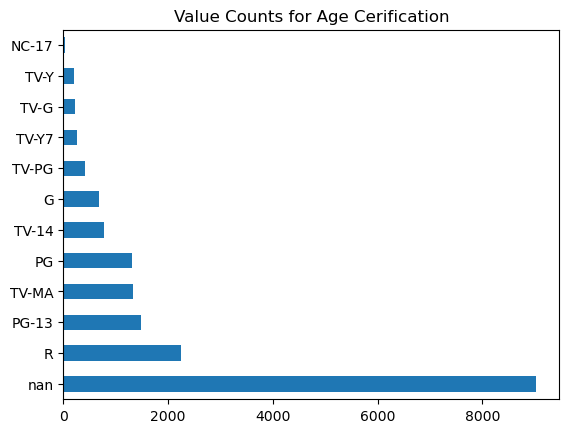

In [31]:
all_titles['age_certification'].value_counts(dropna=False).plot(kind='barh')
plt.title('Value Counts for Age Cerification')
plt.show()

With 51% null values, it doesn't make sense to try and fill them up using the remaining values, so I'm just going to drop this column.

In [32]:
all_titles.drop(columns=['age_certification'],inplace=True)

The seasons column has a high number of nulls because that indicates the % of movies in the dataframe vs TV shows. We can replace the null values in this column with 0 (as movies don't have seasons).

In [33]:
all_titles['seasons'].fillna(0, inplace=True)

That leaves only the `description` column with a few null values. We'll deal with this later during feature engineering.

In [34]:
#Double checking that nothing aside from description has any null values

all_titles.isna().sum()/len(all_titles) * 100

id                      0.000000
title                   0.000000
type                    0.000000
description             0.211252
release_year            0.000000
runtime                 0.000000
genres                  0.000000
production_countries    0.000000
seasons                 0.000000
imdb_id                 0.000000
imdb_score              0.000000
imdb_votes              0.000000
platform                0.000000
dtype: float64

### 2

## Feature engineering 

### a. Extracting actor value information from the Credits table

What I've observed about the credits table is the actors for each title are listed in order of importance to the movie, in other words, how big of a role they play in the movie. Typically the more famous the actor, the higher the ranking in the credits table (for each movie) they are going to be.

So the key intent in this feature engineering is to extract the mean rank, without outliers, and then combine it with the number of titles someone has appeared in.

**Why remove outliers?** <br>
As you'll see further below, even superstars sometimes appear quite low on the rank list, if they have a cameo appearance or it's a documentary with many stars or some such unusual content. And if someone has mostly been rank 1 but is suddenly rank 48 in something, that can throw off the mean completely.

**Why not mode instead of mean?** <br>
This is intended to not confuse character actors (who might be prolific in the number of projects they appear in) as superstars. What I mean is, there are some actors who might frequently appear as rank 1 or 2 in smaller productions, and who do a lot of movies, when they not in the top 5 ranks when they appear in a big production. Think of character actors like Steve Buscemi, Joe Pesci etc. Definitely great supporting actors but not superstars.

**What's the advantage of combining it with the number of titles?** <br>
If I don't use this information, that is - how many titles a particular actor shows up in, then the highest ranked actors will be those who only appeared in 1 or 2 movies as the 1st rank. Think small time documentary films or independently released movies. 

So the intent is to **divide the total number of titles with mean rank (without outliers) to get an actor's value, and then bin it**. It's not a perfect method, but it's the best way to extract this information.


In [35]:
#This code assigns a rank to the cast in the order in which they appear in the listing for each movie-role combo.
#Meaning the Taxi Driver - Actor is one combo (De Niro is first) and then Taxi Driver - Director is another combo (Scorsese is first)

all_credits['rank'] = (all_credits.groupby(['id','role']).cumcount()+1)


In [36]:
all_credits.head()

,person_id,id,name,character,role,rank
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,1
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR,2
2,7064,tm84618,Albert Brooks,Tom,ACTOR,3
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,4
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR,5


In [37]:
#Checking what the ranks are for a known superstar

all_credits[all_credits['name'] == 'Leonardo DiCaprio']

,person_id,id,name,character,role,rank
2089,1641,tm191110,Leonardo DiCaprio,Jack Dawson,ACTOR,2
2553,1641,tm11556,Leonardo DiCaprio,Fee Herod 'The Kid',ACTOR,4
4637,1641,tm111828,Leonardo DiCaprio,Frank Abagnale Jr.,ACTOR,1
4942,1641,tm92641,Leonardo DiCaprio,Dom Cobb,ACTOR,1
4992,1641,tm27911,Leonardo DiCaprio,"William ""Billy"" Costigan, Jr.",ACTOR,2
6938,1641,tm32919,Leonardo DiCaprio,Danny Archer,ACTOR,1
12829,1641,tm41792,Leonardo DiCaprio,Calvin J. Candie,ACTOR,3
64647,1641,tm856378,Leonardo DiCaprio,Dr. Randall Mindy,ACTOR,2
20206,1641,tm109186,Leonardo DiCaprio,Romeo,ACTOR,1
31381,1641,tm86637,Leonardo DiCaprio,Howard Hughes,ACTOR,1


In [38]:
#function to return the mean without outliers


def mean_without_outliers(data, multiplier=1.5):
    """
    Calculates the mean of a pandas Series after removing outliers.

    Args:
        data (pandas.Series): A pandas Series of numerical data.
        multiplier (float): A multiplier used to adjust the strictness of outlier identification. Default is 1.5.

    Returns:
        float: The mean of the data after removing outliers.

    Raises:
        TypeError: If the data input is not a pandas Series.
        ValueError: If the data input is empty.
    """

    if not isinstance(data, pd.Series):
        raise TypeError("Data must be a pandas Series.")
    if data.empty:
        raise ValueError("Data Series cannot be empty.")
    
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered_data.mean()


The key step here was deciding the right multiplier value. I went back and forth on what the right value should be, which I haven't included here as it would make this notebook unnecessarily messy. Essentially the process was checking who came out as the 'Superstars' for different multiplier values and if that list made sense.

In [39]:

multiplier = 0.5
mean_without_outliers = lambda s: s[(s >= np.quantile(s, 0.25) - multiplier * \
                                     (np.quantile(s, 0.75) - np.quantile(s, 0.25))) & 
                                    (s <= np.quantile(s, 0.75) + multiplier * \
                                     (np.quantile(s, 0.75) - np.quantile(s, 0.25)))].mean()

result = all_credits[all_credits['role'] == 'ACTOR'].groupby('name')['rank'].\
apply(mean_without_outliers).reset_index()
#We don't need the mean rank for Directors

In [40]:
#Checking a few results

result[result['name'] == 'Robert De Niro']

,name,rank
114829,Robert De Niro,1.772727


In [41]:
result[result['name'] == 'Leonardo DiCaprio']

,name,rank
81082,Leonardo DiCaprio,1.230769


In [42]:
result = result.rename(columns={'rank':'mean_rank_without_outliers'})

In [43]:
#Adding the mean round without outliers
#to the all_credits dataframe and saving it as a new df

merged_df = pd.merge(all_credits, result, on='name', how='outer')

For the sake of brevity, let's just refer to mean rank without outliers as **mrwo**.

In [44]:
merged_df.isna().sum()

person_id                         0
id                                0
name                              0
character                     31922
role                              0
rank                              0
mean_rank_without_outliers    12549
dtype: int64

The null values in mean_rank without outliers now is the Directors. Let's double check that this is indeed the case.

In [45]:
null_rows = merged_df[merged_df['mean_rank_without_outliers'].isnull()]
null_rows.head()

,person_id,id,name,character,role,rank,mean_rank_without_outliers
291,17727,tm154986,John Boorman,NaN,DIRECTOR,1,NaN
292,17727,tm11602,John Boorman,NaN,DIRECTOR,1,NaN
293,17727,tm23950,John Boorman,NaN,DIRECTOR,1,NaN
693,1063,tm120801,Robert Aldrich,NaN,DIRECTOR,1,NaN
694,1063,tm9997,Robert Aldrich,NaN,DIRECTOR,1,NaN


In [46]:
null_rows[null_rows['role'] == 'ACTOR']

,person_id,id,name,character,role,rank,mean_rank_without_outliers


Having the null values for the directors here might complicate things later on - I'm going to fill this in with a high value for the mean rank (10000).

In [47]:
merged_df['mean_rank_without_outliers'].fillna(value = 10000, inplace=True)

In [48]:
merged_df.isna().sum()

person_id                         0
id                                0
name                              0
character                     31922
role                              0
rank                              0
mean_rank_without_outliers        0
dtype: int64

The character null values are I think also indicating the Directors. Let's have a look.

In [49]:
merged_df[merged_df['character'].isna() & (merged_df['role'] != 'DIRECTOR')].head()

,person_id,id,name,character,role,rank,mean_rank_without_outliers
122,3308,tm28143,Martin Scorsese,NaN,ACTOR,15,15.600000
246,6639,tm329262,Ned Beatty,NaN,ACTOR,1,4.562500
304,11472,ts29199,Graham Chapman,NaN,ACTOR,1,1.000000
314,1549,ts29199,John Cleese,NaN,ACTOR,2,4.156250
350,11474,ts29199,Eric Idle,NaN,ACTOR,5,3.888889


So that wasn't true, we do see some instances where the character name simply isn't known. Not important as we don't really need the character name anyway.

Interesting though that Martin Scorsese is showing up here as an actor as well. This indicates one category we haven't thought of yet - Directors who are also actors (in the same or a different movie). This might affect what their mean_rank is.

In [50]:
merged_df[(merged_df['role'] == 'DIRECTOR') & (merged_df['mean_rank_without_outliers'] < 100)].tail()

,person_id,id,name,character,role,rank,mean_rank_without_outliers
290264,2024134,tm1088712,Michael Munn,NaN,DIRECTOR,1,9.0
290278,238482,tm1019060,Gokul,NaN,DIRECTOR,1,4.0
290303,2088979,tm1078263,Nikki H. Royal,NaN,DIRECTOR,1,6.0
290309,2084915,tm1079144,Jay Nog,NaN,DIRECTOR,1,1.0
290316,1938620,tm1054116,Vishwa Bhanu,NaN,DIRECTOR,1,4.0


In [51]:
#Looking at one example in particular

merged_df[merged_df['name'] == 'Michael Munn']

,person_id,id,name,character,role,rank,mean_rank_without_outliers
290263,516174,tm1088712,Michael Munn,Sutton,ACTOR,9,9.0
290264,2024134,tm1088712,Michael Munn,NaN,DIRECTOR,1,9.0


This is interesting -  we don't want to exclude a superstar actor just because they've been a director - think of Ben Affleck directing Argo as an example.

One person can exist as 2 separate entities in this data - as an actor and as a director. For those that do appear as both, we need to let their mean rank as an actor be whatever it is, but we need to set their mean rank as a director to a very high value (can't set it to 0).

The reason for this is that we are not looking at the mean rank for Directors - it doesn't mean anything (because only 1 Director per movie, typically, so rank will always be 1). And we don't want their rank as an actor to leak into the titles where they are only a director.

To gauge the value of a Director we are adding in the awards data later. 

In [52]:
merged_df['mean_rank_without_outliers'] = np.where((merged_df['role'] == 'DIRECTOR'), 10000, merged_df['mean_rank_without_outliers'])

In [53]:
merged_df[merged_df['role'] == 'DIRECTOR'].sample(5)

,person_id,id,name,character,role,rank,mean_rank_without_outliers
284885,167746,tm876927,Alfred Robbins,NaN,DIRECTOR,1,10000.0
167180,23286,tm11400,Simon Wincer,NaN,DIRECTOR,1,10000.0
289285,1530913,tm1018568,David S. Hogan,NaN,DIRECTOR,1,10000.0
183001,4875,tm85382,David Yates,NaN,DIRECTOR,1,10000.0
13658,6930,tm74006,Dolph Lundgren,NaN,DIRECTOR,1,10000.0


Let's specifically look at Ben Affleck to see if he has a different mean rank as an actor and as a director.

In [54]:
merged_df[merged_df['name'] == 'Ben Affleck'].head(5)

,person_id,id,name,character,role,rank,mean_rank_without_outliers
45102,11977,tm60292,Ben Affleck,Tony Mendez,ACTOR,1,2.090909
45103,11977,tm60292,Ben Affleck,NaN,DIRECTOR,1,10000.000000
45104,11977,tm244207,Ben Affleck,Tom 'Redfly' Davis,ACTOR,1,2.090909
45105,11977,tm464351,Ben Affleck,Treat Morrison,ACTOR,2,2.090909
45106,11977,tm1195971,Ben Affleck,Self,ACTOR,2,2.090909


And indeed he does (the first 2 rows here refer to the movie Argo).

In [55]:
all_credits_new = merged_df

Now, let's add in the count of titles information, which is key to getting the 'value' column - because I want to divide the number of titles an actor has been in, by their mrwo.

In [56]:
#Counting the number of titles per actor/director

title_count = all_credits_new.groupby('name')['id'].count().reset_index()

In [57]:
title_count.rename(columns={'id':'count_of_titles'}, inplace=True)

In [58]:
merged_df = pd.merge(all_credits_new, title_count, on = 'name')

In [59]:
merged_df.sample(5)

,person_id,id,name,character,role,rank,mean_rank_without_outliers,count_of_titles
76083,1621868,tm494288,Catherine Kamau,Lauren,ACTOR,5,5.0,2
255570,1345625,tm163674,Margaret Howell,Singer at Gravesite,ACTOR,23,23.0,1
119321,106430,tm946360,Yootha Wong-Loi-Sing,Stevie Solomon,ACTOR,2,3.5,2
48797,26214,tm29067,Paul Wu,Korean Leader,ACTOR,25,25.0,3
11548,26548,tm6859,Linda Perri,Betty,ACTOR,16,15.0,2


In [60]:
#This is our equation to extract the value.

merged_df['value'] = merged_df['count_of_titles']/(merged_df['mean_rank_without_outliers'])

In [61]:
merged_df.head()

,person_id,id,name,character,role,rank,mean_rank_without_outliers,count_of_titles,value
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,1,1.772727,28,15.794872
1,3748,tm155787,Robert De Niro,James Conway,ACTOR,2,1.772727,28,15.794872
2,3748,tm180542,Robert De Niro,David 'Noodles' Aaronson,ACTOR,1,1.772727,28,15.794872
3,3748,tm145608,Robert De Niro,Leonard Lowe,ACTOR,1,1.772727,28,15.794872
4,3748,tm311902,Robert De Niro,Himself (Uncredited),ACTOR,3,1.772727,28,15.794872


Let's look at who the top names by value are

In [62]:
list_of_values = merged_df[merged_df['role'] == 'ACTOR'].\
groupby(['name','role'])['value'].max().reset_index().\
sort_values(by='value',ascending=False)

In [63]:
list_of_values.sort_values(by='value', ascending=False).head(30)

,name,role,value
23146,Charlie Chaplin,ACTOR,46.000000
117549,Roy Rogers,ACTOR,46.000000
46541,Gene Autry,ACTOR,40.000000
67162,John Wayne,ACTOR,36.000000
26978,Clint Eastwood,ACTOR,34.000000
139247,Walt Disney,ACTOR,31.294118
26507,Clarence Nash,ACTOR,28.583333
122839,Shah Rukh Khan,ACTOR,28.000000
140314,William Boyd,ACTOR,27.000000
109097,Pinto Colvig,ACTOR,26.775000


Though there are some names in there that don't count as superstars (like Larry the Cable guy), broadly this metric is capturing who the highest-value actors are.

Now let's look at what the appropriate value for creating bins might be.

In [64]:
list_of_values.describe()

,value
count,144178.000000
mean,0.319116
std,0.823894
min,0.003195
25%,0.047619
50%,0.102564
75%,0.266667
max,46.000000


In [65]:
list_of_values[list_of_values['value'] >= 13].count()

name     71
role     71
value    71
dtype: int64

In [66]:
list_of_values[list_of_values['value'] == 13]

,name,role,value
63421,Jet Li,ACTOR,13.0
81082,Leonardo DiCaprio,ACTOR,13.0
51972,Hayao Miyazaki,ACTOR,13.0
83818,Louis Koo,ACTOR,13.0
95501,Michela Luci,ACTOR,13.0


In [67]:
list_of_values[list_of_values['value'] >= 9].count()

name     205
role     205
value    205
dtype: int64

In [68]:
list_of_values[list_of_values['value'] >= 4.5].count()

name     834
role     834
value    834
dtype: int64

Let's have a look at the distribution of the values

In [69]:
import seaborn as sns

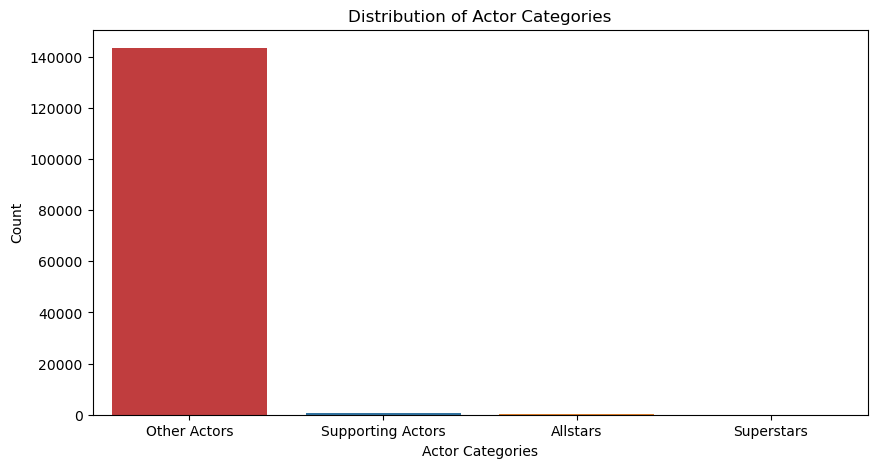

In [91]:
bins = [0, 4.4999, 8.9999, 12.9999, float('inf')]
labels = ['Other Actors', 'Supporting Actors', 'Allstars', 'Superstars']
list_of_values['category'] = pd.cut(list_of_values['value'], bins=bins, labels=labels)

# Create a custom color palette so we don't get the default colour for the 1st bar for the next 2 graphs
colors = ['#d62728','#1f77b4', '#ff7f0e','#2ca02c']
custom_palette = sns.color_palette(colors)

plt.figure(figsize=(10, 5))
sns.countplot(data=list_of_values, x='category', order=labels, palette=custom_palette)
plt.title('Distribution of Actor Categories')
plt.xlabel('Actor Categories')
plt.ylabel('Count')
plt.savefig('visuals/actors_distribution.png')
plt.show()

This is as expected - you have very few superstars but lots of role playing actors. Let's remove the Other Actors (which is skewing the plot) and look at only the other 3 to get a better idea of the distribution.

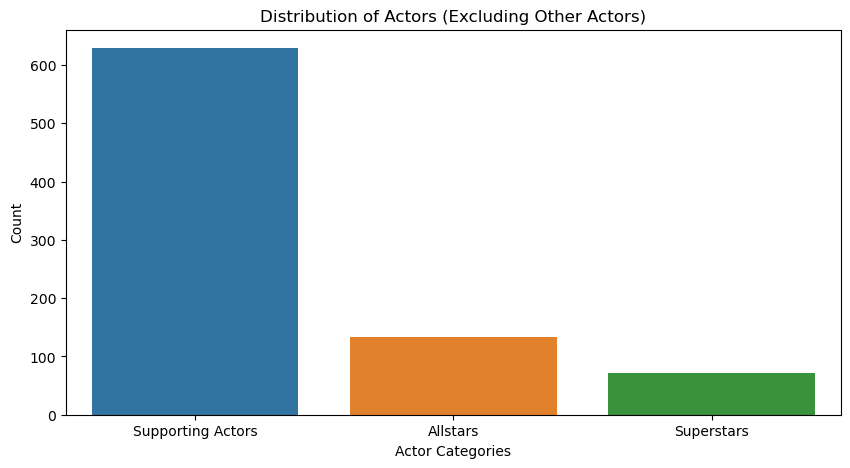

In [94]:
filtered_df = list_of_values[list_of_values['category'] != 'Other Actors']

plt.figure(figsize=(10, 5))
sns.countplot(data=filtered_df, x='category', order=labels[1:])
plt.title('Distribution of Actors (Excluding Other Actors)')
plt.xlabel('Actor Categories')
plt.ylabel('Count')
plt.savefig('visuals/actors_distribution_no_others.png')
plt.show()

In [195]:
#And listing out distribution for better clarity
list_of_values['category'].value_counts()

Other Actors         143344
Supporting Actors       629
Allstars                134
Superstars               71
Name: category, dtype: int64

In [95]:
#Binning the actors by value counts
#Doing it again this way as I had already written this function - the graphs above are a later addition

def get_actor_count(value):
    if value >= 13:
        return 'Superstars'
    elif 9 <= value < 13:
        return 'Allstars'
    elif 4.5 <= value < 9:
        return 'Supporting_Actors'
    elif 0 < value < 4.5:
        return 'Other_Actors'
    else:
        return 'None'

In [96]:
merged_df['Superstars'] = merged_df['value'].apply(lambda x: get_actor_count(x) == 'Superstars')
merged_df['Allstars'] = merged_df['value'].apply(lambda x: get_actor_count(x) == 'Allstars')
merged_df['Supporting_Actors'] = merged_df['value'].apply(lambda x: get_actor_count(x)=='Supporting_Actors')
merged_df['Other_Actors'] = merged_df['value'].apply(lambda x: get_actor_count(x)=='Other_Actors')

In [97]:
merged_df.sample(5)

,person_id,id,name,character,role,rank,mean_rank_without_outliers,count_of_titles,value,Superstars,Allstars,Supporting_Actors,Other_Actors
215960,456548,tm68246,Cameron Mitchell Jr.,Country Club Manager,ACTOR,31,31.000000,1,0.032258,False,False,False,True
128520,16545,tm29497,Ken Stott,Simon Peter,ACTOR,21,7.166667,8,1.116279,False,False,False,True
222657,205100,tm159975,Sybil Jason,Becky,ACTOR,44,44.000000,1,0.022727,False,False,False,True
82639,10054,ts16101,Tom Riley,Leonardo Da Vinci,ACTOR,1,2.400000,6,2.500000,False,False,False,True
201921,15757,tm115621,Eric Jacobson,Bobby Becker,ACTOR,4,4.111111,10,2.432432,False,False,False,True


This is the right place to now add in information on award wins. The reason I'm doing this is to potentially improve the performance of the model for IMDB rating (for example, if the movie has an Oscar winning actor or actress, it increases the likelihood of it being a highly rated movie). 

### 2.b

### Adding in awards information

For this, I've taken the acting winners for the Oscars and the Emmys, and the directing winners and nominees for the Oscars.

The reason I've taken the director winners and nominees for the Oscars is that only one director wins per year, whereas 4 actors win every year. So I just wanted to expand the field of quality directors a bit. Christopher Nolan, for example, has been a nominee but never a winner.

For the Emmys, getting the director information was a bit harder because of the way the data has been entered in that dataframe, so I left that out.

I did consider adding other award information like the BAFTAs but content from the UK is a relatively small part of the dataset so I dropped the idea.

In [98]:
oscar_acting_winners = pd.read_csv('data/oscar_acting_winners.csv')
oscar_directing_winners = pd.read_csv('data/oscar_directing_winners.csv')
oscar_directing_nominees = pd.read_csv('data/oscar_directing_nominees.csv')
emmy_acting_winners = pd.read_csv('data/emmy_acting_winners.csv')

In [99]:
#Defining a function to check if a particular person has won any of the awards

def check_awards(row, award_df, role):
    return row['name'] in award_df['name'].values and row['role'] == role

In [100]:
merged_df['oscar_acting'] = merged_df.apply(lambda row: check_awards(row, oscar_acting_winners, 'ACTOR'), axis=1)
merged_df['oscar_directing'] = merged_df.apply(lambda row: check_awards(row, oscar_directing_winners, 'DIRECTOR'), axis=1)
merged_df['oscar_directing_nominee'] = merged_df.apply(lambda row: check_awards(row, oscar_directing_nominees, 'DIRECTOR'), axis=1)
merged_df['emmy_acting'] = merged_df.apply(lambda row: check_awards(row, emmy_acting_winners, 'ACTOR'), axis=1)

Now I'm just going to check a few names to see if the awards were added in correctly

In [101]:
merged_df[merged_df['name'] == 'Arnold Schwarzenegger'].head(1)

,person_id,id,name,character,role,rank,mean_rank_without_outliers,count_of_titles,value,Superstars,Allstars,Supporting_Actors,Other_Actors,oscar_acting,oscar_directing,oscar_directing_nominee,emmy_acting
11173,1542,tm187187,Arnold Schwarzenegger,Jack Slater / Himself,ACTOR,1,1.545455,14,9.058824,False,True,False,False,False,False,False,False


In [102]:
merged_df[merged_df['name'] == 'Marlon Brando'].head(1)

,person_id,id,name,character,role,rank,mean_rank_without_outliers,count_of_titles,value,Superstars,Allstars,Supporting_Actors,Other_Actors,oscar_acting,oscar_directing,oscar_directing_nominee,emmy_acting
23865,9062,tm195620,Marlon Brando,Colonello Walter E. Kurtz,ACTOR,1,4.2,12,2.857143,False,False,False,True,True,False,False,False


It's unfortunate that neither Marlon Brando nor Arnold Schwarzenegger were identified as Superstars, but at least the awards for Brando (and lack of them for Arnold) are correctly identified.

In [103]:
#Double checking for no null values
#The character null values are fine

merged_df.isna().sum()

person_id                         0
id                                0
name                              0
character                     31922
role                              0
rank                              0
mean_rank_without_outliers        0
count_of_titles                   0
value                             0
Superstars                        0
Allstars                          0
Supporting_Actors                 0
Other_Actors                      0
oscar_acting                      0
oscar_directing                   0
oscar_directing_nominee           0
emmy_acting                       0
dtype: int64

Now I'm going to collapse the dataframe into one that is grouped by the title id, and counts how many of each category of actor and director we have.

In [104]:
grouped_df = merged_df.groupby('id').agg({'Superstars' : 'sum', 'Allstars' : 'sum', \
                                          'Supporting_Actors' : 'sum', 'Other_Actors' : 'sum', 'oscar_acting' : 'sum',\
                                         'oscar_directing' : 'sum', 'oscar_directing_nominee' : 'sum',\
                                         'emmy_acting' : 'sum'}).reset_index()


In [105]:
grouped_df.sort_values(by = 'Superstars', ascending=False).head(10)

,id,Superstars,Allstars,Supporting_Actors,Other_Actors,oscar_acting,oscar_directing,oscar_directing_nominee,emmy_acting
11516,tm68190,5,3,8,41,7,0,0,3
811,tm1069983,5,3,5,27,9,0,0,2
4473,tm178513,5,5,8,17,0,0,0,0
8120,tm36475,4,3,4,44,0,0,0,0
11750,tm73058,4,7,10,46,0,0,0,0
7444,tm32643,4,1,13,115,20,0,0,1
13184,tm85992,3,0,5,61,5,1,1,3
11306,tm64663,3,0,0,1,0,0,0,0
4960,tm189865,3,0,1,6,0,0,0,0
1746,tm116863,3,0,1,4,0,0,0,0


In [106]:
#Checking what title has 9 oscar winners. The one with 20 must be a documentary

all_titles[all_titles['id'] == 'tm1069983']

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,platform
8987,tm1069983,Val,MOVIE,"For over 40 years Val Kilmer, one of Hollywood...",2021,109,['documentation'],['US'],0.0,tt14733616,7.7,10045.0,prime


And this was also a documentary.

In [107]:
#Checking the count for 'The Departed'
grouped_df[grouped_df['id'] == 'tm27911']

,id,Superstars,Allstars,Supporting_Actors,Other_Actors,oscar_acting,oscar_directing,oscar_directing_nominee,emmy_acting
6710,tm27911,3,2,1,71,2,1,1,2


That looks about right.

In [108]:
#Saving this to a csv file
grouped_df.to_csv('data/actor_bins_by_title.csv')

In [109]:
# Joining the actors list with all_titles right now

all_titles = pd.merge(all_titles, grouped_df, how = 'inner', on='id')

In [110]:
all_titles.isna().sum()

id                         0
title                      0
type                       0
description                5
release_year               0
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                    0
imdb_score                 0
imdb_votes                 0
platform                   0
Superstars                 0
Allstars                   0
Supporting_Actors          0
Other_Actors               0
oscar_acting               0
oscar_directing            0
oscar_directing_nominee    0
emmy_acting                0
dtype: int64

Let's look at a couple of visuals for our newly engineered features, vs the target variables.

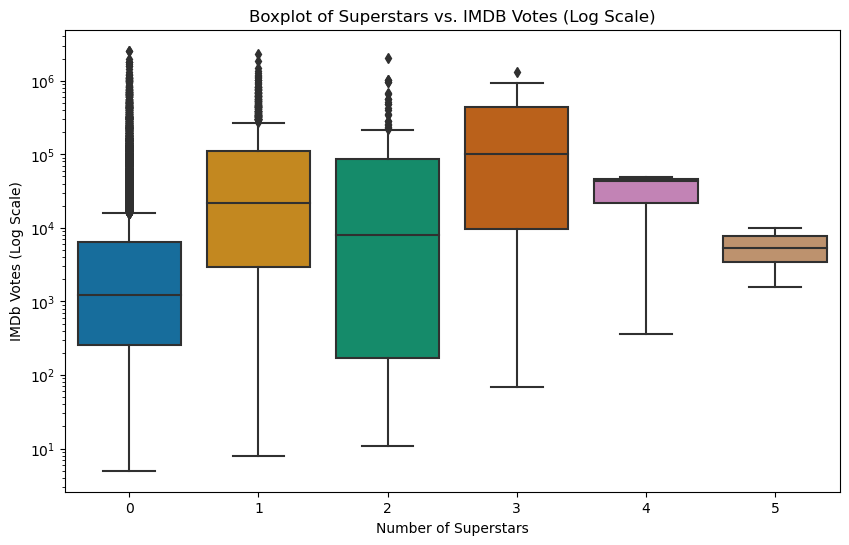

In [204]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_titles, x='Superstars', y='imdb_votes', palette='colorblind') #to avoid red/green boxplots next to each other
plt.title('Boxplot of Superstars vs. IMDB Votes (Log Scale)')
plt.xlabel('Number of Superstars')
plt.ylabel('IMDb Votes (Log Scale)')
plt.yscale("log")
plt.savefig('visuals/square_superstars_votes.png')
plt.show()

The above plot tells us that while having the presence of 'Superstars' (as defined here) doesn't necessarily guarantee a high number of votes, it does in general raise the median number of votes received. The magic number of Superstars seems to be 3, after which it drops off. Let's look at which titles have more than 3 superstars.

In [112]:
all_titles[all_titles['Superstars'] > 3]

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,...,imdb_votes,platform,Superstars,Allstars,Supporting_Actors,Other_Actors,oscar_acting,oscar_directing,oscar_directing_nominee,emmy_acting
383,tm73058,Om Shanti Om,MOVIE,Reincarnated 30 years after being killed in a ...,2007,162,"['thriller', 'drama', 'action', 'comedy', 'fan...",['IN'],0.0,tt1423972,...,43052.0,netflix,4,7,10,46,0,0,0,0
386,tm36475,Kabhi Khushi Kabhie Gham,MOVIE,Years after his father disowns his adopted bro...,2001,210,"['drama', 'romance']",['IN'],0.0,tt0248126,...,49273.0,netflix,4,3,4,44,0,0,0,0
923,tm178513,Bombay Talkies,MOVIE,One hundred years of Hindi cinema is celebrate...,2013,127,"['drama', 'romance']",['IN'],0.0,tt2797242,...,5402.0,netflix,5,5,8,17,0,0,0,0
10034,tm32643,Hollywood Without Make-Up,MOVIE,A collection of behind the scenes and home mov...,1963,50,['documentation'],['US'],0.0,tt0407874,...,363.0,prime,4,1,13,115,20,0,0,1
12514,tm68190,Casting By,MOVIE,This essential new documentary pays tribute to...,2012,89,['documentation'],['CA'],0.0,tt1293751,...,1561.0,prime,5,3,8,41,7,0,0,3
16293,tm1069983,Val,MOVIE,"For over 40 years Val Kilmer, one of Hollywood...",2021,109,['documentation'],['US'],0.0,tt14733616,...,10045.0,prime,5,3,5,27,9,0,0,2


3 of these are documentaries (not the most popular genre), and the others are Indian films - whilst popular in India, they don't have the kind of global appeal needed for millions of IMDB votes.

Give the titles for movies with 4 and 5 superstars is such a small sample size, let's create the boxplot again to show only titles with 0, 1, 2 and 3 superstars.

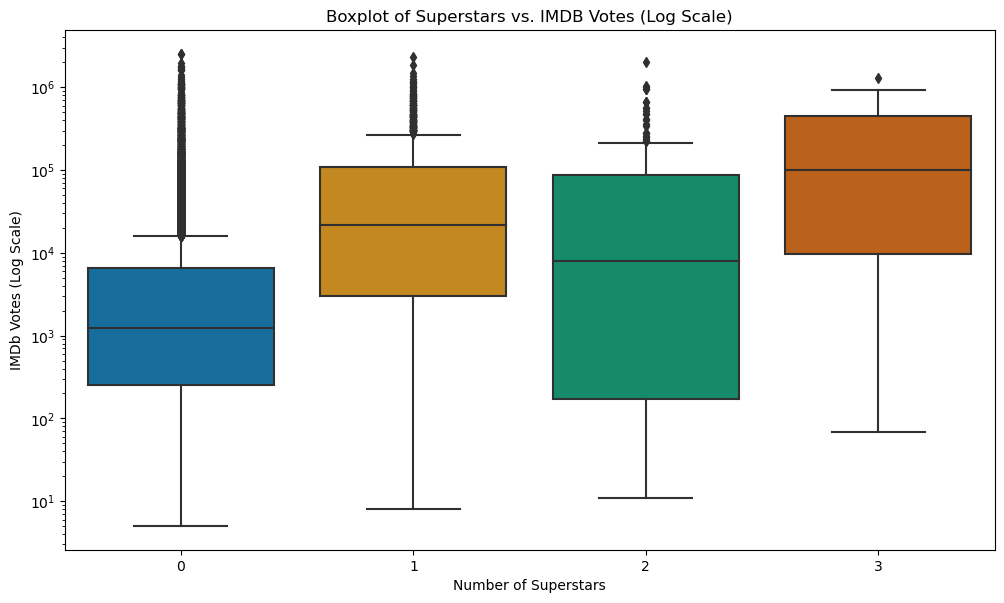

In [207]:
plt.figure(figsize=(12, 6.75))

# Filter the DataFrame to include only superstar counts of 0, 1, 2, and 3
filtered_all_titles = all_titles[all_titles['Superstars'].isin([0, 1, 2, 3])]

sns.boxplot(data=filtered_all_titles, x='Superstars', y='imdb_votes', palette='colorblind')
plt.title('Boxplot of Superstars vs. IMDB Votes (Log Scale)')
plt.xlabel('Number of Superstars')
plt.ylabel('IMDb Votes (Log Scale)')
plt.yscale("log")
plt.savefig('visuals/filtered_square_superstars_votes.png')
plt.show()

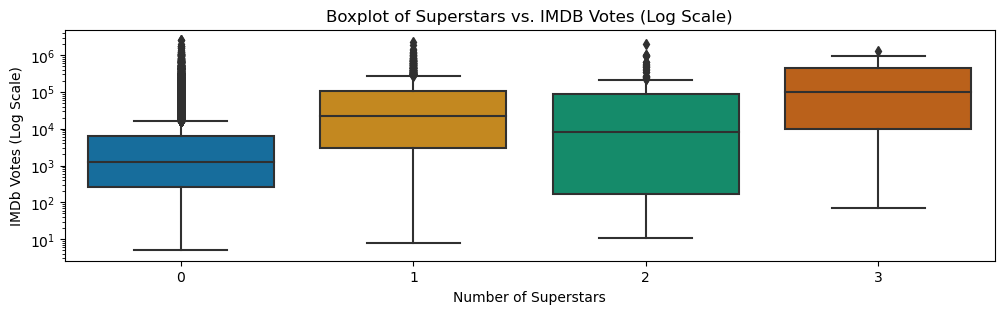

In [211]:
plt.figure(figsize=(12, 3))

# Filter the DataFrame to include only superstar counts of 0, 1, 2, and 3
filtered_all_titles = all_titles[all_titles['Superstars'].isin([0, 1, 2, 3])]

sns.boxplot(data=filtered_all_titles, x='Superstars', y='imdb_votes', palette='colorblind')
plt.title('Boxplot of Superstars vs. IMDB Votes (Log Scale)')
plt.xlabel('Number of Superstars')
plt.ylabel('IMDb Votes (Log Scale)')
plt.yscale("log")
plt.savefig('visuals/filtered_rectangle_superstars_votes.png')
plt.show()

Now creating similar boxplot to show IMDB rating vs Oscar directing wins

In [202]:
#Somehow it picked up 2 directing wins for a couple of rows, just reducing that to 1 
all_titles['oscar_directing'] = np.where((all_titles['oscar_directing'] == 2), 1, all_titles['oscar_directing'])

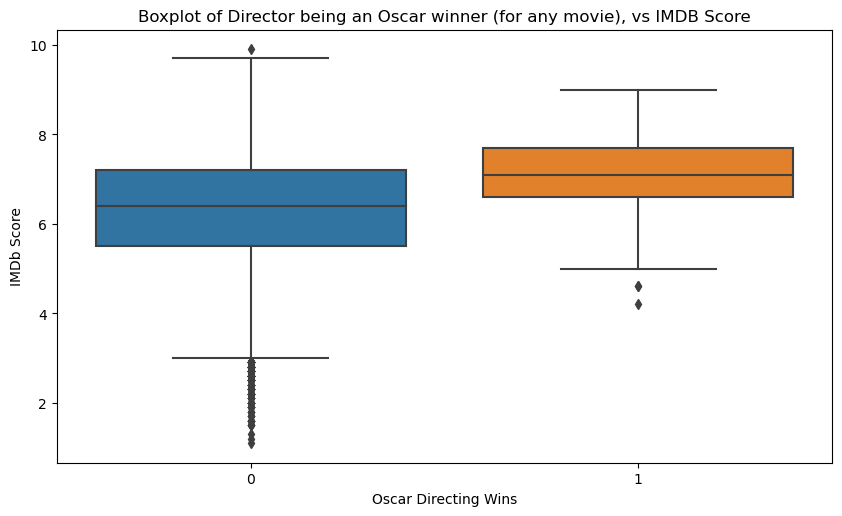

In [209]:
plt.figure(figsize=(10, 5.625))
sns.boxplot(data=all_titles, x='oscar_directing', y='imdb_score')
plt.title('Boxplot of Director being an Oscar winner (for any movie), vs IMDB Score')
plt.xlabel('Oscar Directing Wins')
plt.ylabel('IMDb Score')
plt.savefig('visuals/directing_oscars_score')
plt.show()

The above boxplot shows the IMDB score for movies that have an Oscar winning director (meaning an Oscar win in his/her career, not necessarily for the movie in question) vs for movies that don't. And again, while having an Oscar winning director doesn't guarantee a high IMDB score, it definitely raises the median and the floor.

### 2.c

### `Genres` column

In [200]:
all_titles['genres'].value_counts().reset_index().head()

,index,genres
0,['comedy'],1028
1,['drama'],1022
2,['documentation'],845
3,"['drama', 'romance']",320
4,"['comedy', 'drama']",295


There's 2 changes that we need to make here. First of all, the we need to process the string to remove the [] brackets and also the ''. Secondly, given the titles can be multiple-genre, we need to identify the unique genres in this list and then vectorize them.

In [115]:
genres = all_titles['genres']

In [116]:
genres.head()

0                             ['drama', 'crime']
1    ['drama', 'action', 'thriller', 'european']
2                ['fantasy', 'action', 'comedy']
3                              ['war', 'action']
4                         ['comedy', 'european']
Name: genres, dtype: object

In [117]:
genres = pd.DataFrame(genres)

In [118]:
genres.head()

,genres
0,"['drama', 'crime']"
1,"['drama', 'action', 'thriller', 'european']"
2,"['fantasy', 'action', 'comedy']"
3,"['war', 'action']"
4,"['comedy', 'european']"


In [119]:

#Needed to do the next 3 steps one after the other, it wasn't working without that

genres['genres'] = genres['genres'].str.replace('[','')

/var/folders/rc/5snd6r290r114krvxnyr5c2m0000gn/T/ipykernel_3806/1857513231.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  genres['genres'] = genres['genres'].str.replace('[','')


In [120]:
genres['genres'] = genres['genres'].str.replace(']','')

/var/folders/rc/5snd6r290r114krvxnyr5c2m0000gn/T/ipykernel_3806/488273398.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  genres['genres'] = genres['genres'].str.replace(']','')


In [121]:
genres['genres'] = genres['genres'].str.replace("'",'')

In [201]:
genres.head(10)

,genres
0,"drama, crime"
1,"drama, action, thriller, european"
2,"fantasy, action, comedy"
3,"war, action"
4,"comedy, european"
5,comedy
6,"thriller, action, crime"
7,"crime, drama, action"
8,"romance, action, drama"
9,"action, drama, war"


In [123]:
import sklearn

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [125]:
# 1. Instantiate 
bagofwords = CountVectorizer()

# 2. Fit 
bagofwords.fit(genres['genres'])

# 3. Transform
genres_transformed = bagofwords.transform(genres['genres'])
genres_transformed

<16840x19 sparse matrix of type '<class 'numpy.int64'>'
	with 44072 stored elements in Compressed Sparse Row format>

In [126]:
bagofwords.get_feature_names_out()

array(['action', 'animation', 'comedy', 'crime', 'documentation', 'drama',
       'european', 'family', 'fantasy', 'history', 'horror', 'music',
       'reality', 'romance', 'scifi', 'sport', 'thriller', 'war',
       'western'], dtype=object)

In [127]:
len(bagofwords.get_feature_names_out())

19

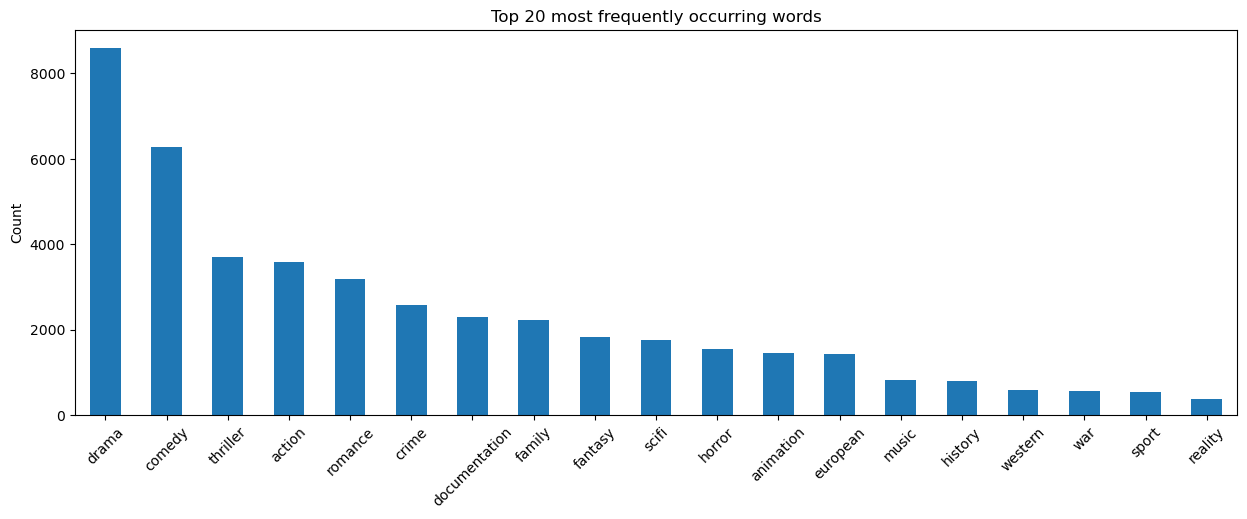

In [128]:
word_counts = pd.DataFrame(
    {"counts": genres_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Because we're working with a lot of text data here, we're going to be plotting this sort of word graph fairly often. I'm just going to write a function to do this.

In [129]:
def plot_top_words(sparse_matrix, vectorizer=bagofwords, num_words=20, output_file=None):
    
    """
    Plots a bar chart of the top `num_words` most frequently occurring words in a given sparse matrix.
    
    Parameters:
    -----------
    sparse_matrix : scipy.sparse matrix
        A sparse matrix representation of the text data, typically created using a CountVectorizer or TfidfVectorizer.
    
    vectorizer : CountVectorizer
        The vectorizer used to create the sparse matrix (must be an instance of sklearn.feature_extraction.text.CountVectorizer).
    
    num_words : int, optional, default: 20
        The number of top words to plot.

    Raises:
    -------
    ValueError
        If the input matrix is not a sparse matrix, the vectorizer is not an instance of CountVectorizer, or the number of words is not a positive integer.

    Returns:
    --------
    None
    """
    
    from scipy.sparse import isspmatrix
    
    if not isspmatrix(sparse_matrix):
        raise ValueError("Input matrix must be a sparse matrix")
    
    if not isinstance(vectorizer, CountVectorizer):
        raise ValueError("Vectorizer must be an instance of CountVectorizer")
    
    if not isinstance(num_words, int) or num_words < 1:
        raise ValueError("Number of words must be a positive integer")

    word_counts = pd.DataFrame(
        {"counts": sparse_matrix.toarray().sum(axis=0)},
        index=vectorizer.get_feature_names_out()
    ).sort_values("counts", ascending=False)

    word_counts.head(num_words).plot(kind="bar", figsize=(15, 5), legend=False)
    plt.title(f"Top {num_words} most frequently occurring words/tokens")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    if output_file:
        plt.savefig(output_file, bbox_inches='tight')
    else:
        plt.show()

In [130]:
word_counts = pd.DataFrame(
    {"counts": genres_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

In [131]:
word_counts

,counts
drama,8588
comedy,6276
thriller,3691
action,3571
romance,3192
crime,2578
documentation,2304
family,2220
fantasy,1821
scifi,1757


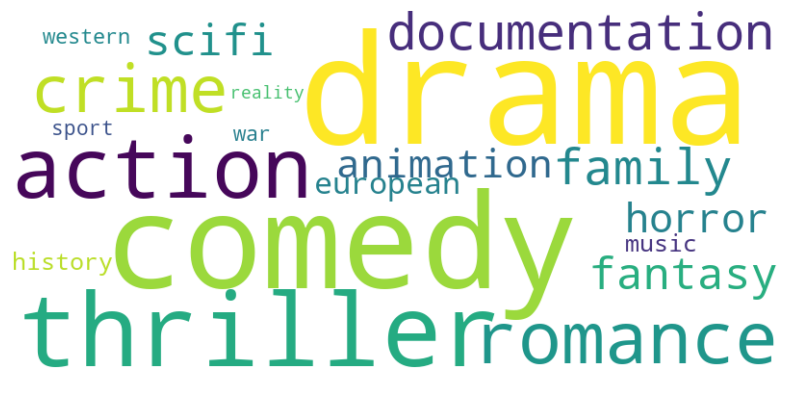

In [132]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'word_counts' DataFrame is already created as mentioned in your question
# Get the top 20 words
top_20_words = word_counts.head(19)

# Create a dictionary of words and their counts
word_dict = top_20_words.to_dict()["counts"]

# Generate a word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(word_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('genres word cloud1.png')
plt.show()

In [133]:
column_names = [f'genre_{name}' for name in bagofwords.get_feature_names_out()] #To start all column names with genre_

genres_vectorized = pd.DataFrame(columns=column_names, data=genres_transformed.toarray())
genres_vectorized.head(10)

,genre_action,genre_animation,genre_comedy,genre_crime,genre_documentation,genre_drama,genre_european,genre_family,genre_fantasy,genre_history,genre_horror,genre_music,genre_reality,genre_romance,genre_scifi,genre_sport,genre_thriller,genre_war,genre_western
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
9,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


## 2.d

## `titles` column

Now encoding the titles columns

In [134]:
# 1. Instantiate 
bagofwords = CountVectorizer()

# 2. Fit 
bagofwords.fit(all_titles['title'])

# 3. Transform
titles_transformed = bagofwords.transform(all_titles['title'])
titles_transformed

<16840x13354 sparse matrix of type '<class 'numpy.int64'>'
	with 48793 stored elements in Compressed Sparse Row format>

We're getting too large a dataframe - we need to tune the hyperparameters here to lower the number of words we're getting back.

In [135]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english")

# 2. Fit 
bagofwords.fit(all_titles['title'])

# 3. Transform
titles_transformed = bagofwords.transform(all_titles['title'])
titles_transformed

<16840x13112 sparse matrix of type '<class 'numpy.int64'>'
	with 35764 stored elements in Compressed Sparse Row format>

Still too large a dataframe, but let's look at what the top 20 words are

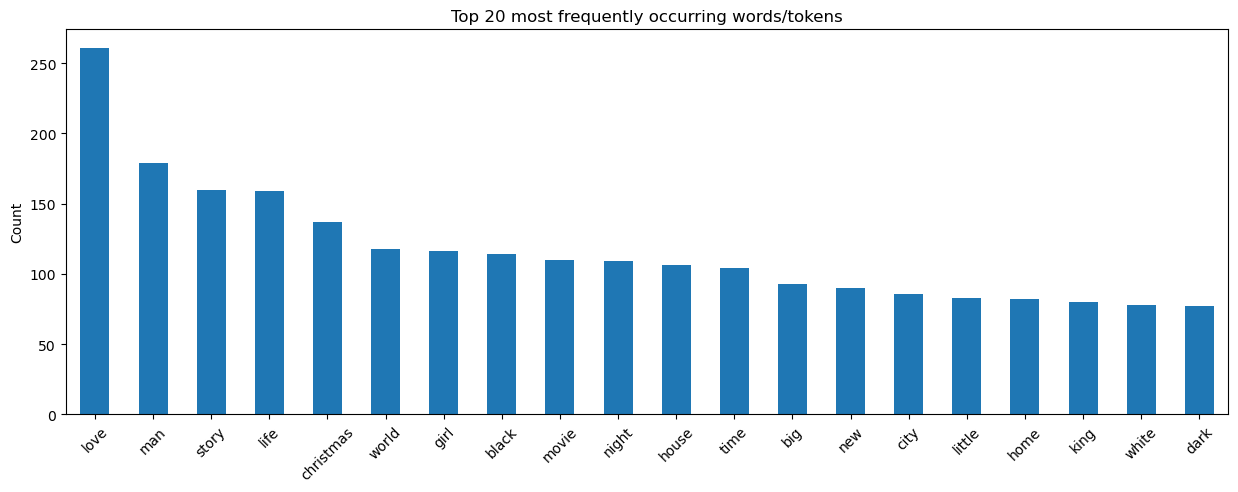

In [136]:
plot_top_words(titles_transformed, bagofwords)

So it's actually giving us back some useful words. Let's prune this a bit by tuning the the min_df parameter to reduce the number of words.

In [137]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english", min_df = 25)

# 2. Fit 
bagofwords.fit(all_titles['title'])

# 3. Transform
titles_transformed = bagofwords.transform(all_titles['title'])
titles_transformed

<16840x160 sparse matrix of type '<class 'numpy.int64'>'
	with 7641 stored elements in Compressed Sparse Row format>

This is good - a list of 183 words that are in a minimum of 25 content titles. Let's lock in on this as content title features for single words.

I do also want to take a look at if any 2/3 word tokens are common.

In [138]:
# 1. Instantiate 
bagofwords2 = CountVectorizer(stop_words="english", min_df=5, ngram_range=(2,3))

# 2. Fit 
bagofwords2.fit(all_titles['title'])

# 3. Transform
titles_transformed_2 = bagofwords2.transform(all_titles['title'])
titles_transformed_2

<16840x102 sparse matrix of type '<class 'numpy.int64'>'
	with 661 stored elements in Compressed Sparse Row format>

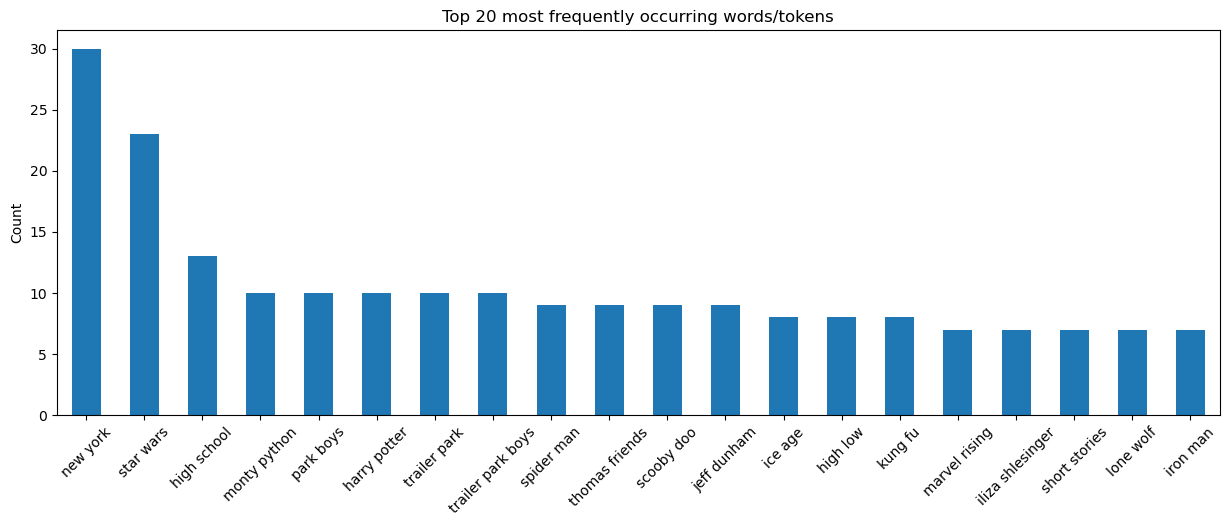

In [139]:
plot_top_words(titles_transformed_2, bagofwords2)

These seem very specific to particular content titles (like Harry Potter, Star Wars). And even the highest one (New York) is only appearing in about 31 movies. It doesn't make sense to include this.

In [140]:
#Creating the data frame for the titles vectorized

column_names = [f'title_{name}' for name in bagofwords.get_feature_names_out()] #To start all column names with title_

titles_vectorized = pd.DataFrame(columns=column_names, data=titles_transformed.toarray())
titles_vectorized.head(10)

,title_10,title_adventure,title_adventures,title_age,title_america,title_american,title_away,title_baby,title_bad,title_batman,...,title_white,title_wild,title_wolf,title_woman,title_women,title_world,title_year,title_years,title_york,title_young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.e

## `description` column

In [141]:
all_titles['description'].isna().sum()

5

In [142]:
all_titles.isna().sum()

id                         0
title                      0
type                       0
description                5
release_year               0
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                    0
imdb_score                 0
imdb_votes                 0
platform                   0
Superstars                 0
Allstars                   0
Supporting_Actors          0
Other_Actors               0
oscar_acting               0
oscar_directing            0
oscar_directing_nominee    0
emmy_acting                0
dtype: int64

In [143]:
#Filling all the null values with a stop word so it's easy to remove

all_titles['description'].fillna('the', inplace=True)

In [144]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english", min_df = 25)

# 2. Fit 
bagofwords.fit(all_titles['description'])

# 3. Transform
descriptions_transformed = bagofwords.transform(all_titles['description'])
descriptions_transformed

<16840x2963 sparse matrix of type '<class 'numpy.int64'>'
	with 267441 stored elements in Compressed Sparse Row format>

3149 is a decent starting point for a number of words extracted, though we will need to narrow it further. Let's see what the top ones are.

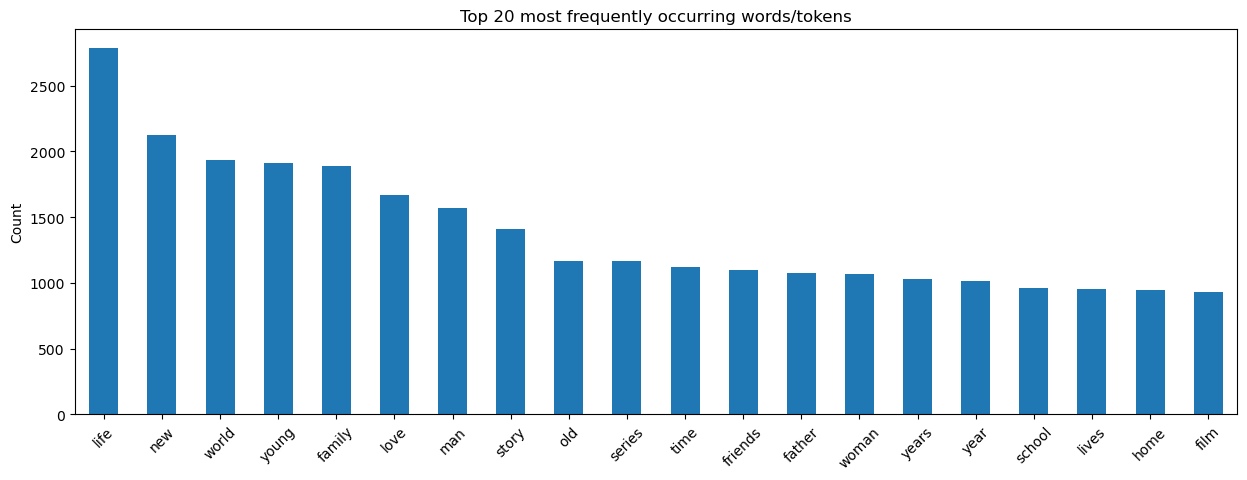

In [145]:
plot_top_words(descriptions_transformed, bagofwords)

Interesting list. We can see 'love' is again amongst the top ones here, just as it was in title. Now I'm going to tune the min_df parameter to reduce the number of words further.

In [146]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english", min_df = 150)

# 2. Fit 
bagofwords.fit(all_titles['description'])

# 3. Transform
descriptions_transformed = bagofwords.transform(all_titles['description'])
descriptions_transformed

<16840x377 sparse matrix of type '<class 'numpy.int64'>'
	with 124979 stored elements in Compressed Sparse Row format>

This seems like a fair number of single word tokens (413). Let's now take a look at the 2 word ngrams.

In [147]:
# 1. Instantiate 
bagofwords2 = CountVectorizer(stop_words="english", min_df = 25, ngram_range=(2,2))

# 2. Fit 
bagofwords2.fit(all_titles['description'])

# 3. Transform
descriptions_transformed_2 = bagofwords2.transform(all_titles['description'])
descriptions_transformed_2

<16840x179 sparse matrix of type '<class 'numpy.int64'>'
	with 9859 stored elements in Compressed Sparse Row format>

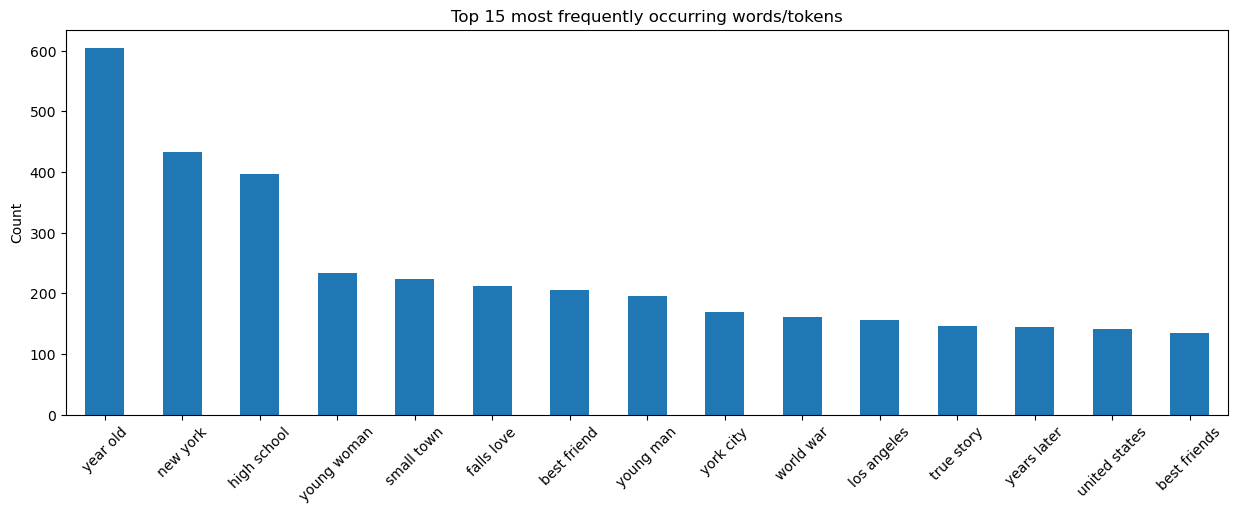

In [148]:
plot_top_words(descriptions_transformed_2, bagofwords2, 15,'bar_chart.png')

Definitely some good tokens in here. 'Small town' jumps out, probably indicating the Hallmark type movies. 'World war' is also interesting, as world war movies are almost a genre unto themselves.

Some redundancy here (like 'new york' and 'york city') but overall this looks like a good list.

In [149]:
word_counts = pd.DataFrame(
    {"counts": descriptions_transformed_2.toarray().sum(axis=0)},
    index=bagofwords2.get_feature_names_out()
).sort_values("counts", ascending=False)

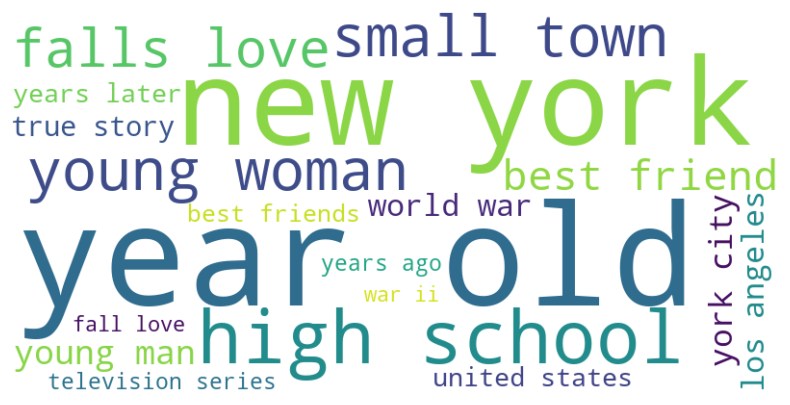

In [150]:
# Get the top 20 words
top_20_words = word_counts.head(19)

# Create a dictionary of words and their counts
word_dict = top_20_words.to_dict()["counts"]

# Generate a word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(word_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [151]:
#Creating the data frame for the description vectorized

column_names = [f'description_{name}' for name in bagofwords.get_feature_names_out()] #To start all column names with title_

description_vectorized = pd.DataFrame(columns=column_names, data=descriptions_transformed.toarray())
description_vectorized.head(10)

,description_accident,description_action,description_adventure,description_adventures,description_age,description_agent,description_ago,description_america,description_american,description_angeles,...,description_women,description_work,description_working,description_works,description_world,description_writer,description_year,description_years,description_york,description_young
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
#Creating the data frame for the description 2 and 3 word ngrams vectorized

column_names = [f'description_{name}' for name in bagofwords2.get_feature_names_out()] #To start all column names with title_

description_vectorized_2 = pd.DataFrame(columns=column_names, data=descriptions_transformed_2.toarray())
description_vectorized_2.head(10)

,description_10 year,description_10 years,description_11 year,description_12 year,description_13 year,description_14 year,description_15 year,description_16 year,description_17 year,description_19th century,...,description_young couple,description_young daughter,description_young girl,description_young man,description_young men,description_young people,description_young son,description_young woman,description_young women,description_younger brother
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.f 

## `seasons` column

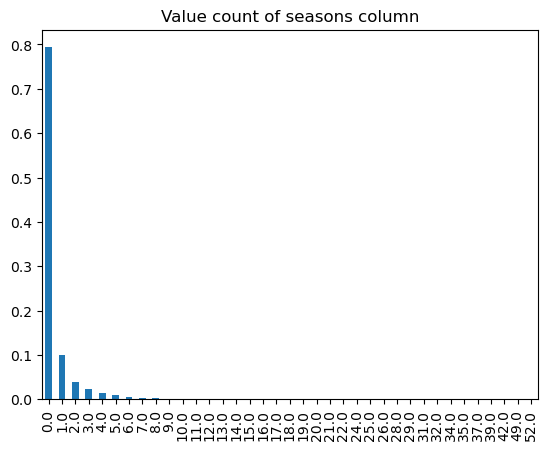

In [153]:
all_titles['seasons'].value_counts(normalize=True, dropna=False).sort_index().plot(kind='bar')
plt.title('Value count of seasons column')
plt.show()

First of all, I can't believe that some shows have more than 40 seasons. But more importantly, we already dealt with this at the beginning of the notebook by filling in the NaN values with 0. The NaN values indicate that it's a movie.

Directly related to this, lets deal with the `type` column next

## 2.g

## `type` column

In [154]:
all_titles_processed = all_titles.copy()

In [155]:
all_titles_processed['type'] = np.where((all_titles_processed['type'] == 'MOVIE'), 1, 0)

In [156]:
all_titles_processed['type'].value_counts(normalize=True)

1    0.793646
0    0.206354
Name: type, dtype: float64

In [157]:
all_titles.head()

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,...,imdb_votes,platform,Superstars,Allstars,Supporting_Actors,Other_Actors,oscar_acting,oscar_directing,oscar_directing_nominee,emmy_acting
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"['drama', 'crime']",['US'],0.0,tt0075314,...,808582.0,netflix,1,0,1,35,2,1,1,0
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,tt0068473,...,107673.0,netflix,0,0,2,21,1,0,1,1
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,tt0071853,...,534486.0,netflix,0,1,3,44,0,0,0,0
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"['war', 'action']","['GB', 'US']",0.0,tt0061578,...,72662.0,netflix,0,1,1,53,3,0,0,0
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,30,"['comedy', 'european']",['GB'],4.0,tt0063929,...,73424.0,netflix,0,1,2,2,0,0,0,0


In [158]:
all_titles_processed.shape

(16840, 21)

## 2.h

## `production_countries` column

In [159]:
production_countries = all_titles['production_countries']

In [160]:
production_countries = pd.DataFrame(production_countries)

In [161]:
production_countries.head(10)

,production_countries
0,['US']
1,['US']
2,['GB']
3,"['GB', 'US']"
4,['GB']
5,['GB']
6,['US']
7,['US']
8,['US']
9,"['GB', 'US']"


In [162]:
#Needed to do the next 3 steps one after the other, it wasn't working without that

production_countries['production_countries'] = \
production_countries['production_countries'].str.replace('[','')

production_countries['production_countries'] = \
production_countries['production_countries'].str.replace(']','')

production_countries['production_countries'] = \
production_countries['production_countries'].str.replace("'",'')

/var/folders/rc/5snd6r290r114krvxnyr5c2m0000gn/T/ipykernel_3806/3678145252.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  production_countries['production_countries'].str.replace('[','')
/var/folders/rc/5snd6r290r114krvxnyr5c2m0000gn/T/ipykernel_3806/3678145252.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  production_countries['production_countries'].str.replace(']','')


In [163]:
production_countries.head(10)

,production_countries
0,US
1,US
2,GB
3,"GB, US"
4,GB
5,GB
6,US
7,US
8,US
9,"GB, US"


In [164]:
len(production_countries[production_countries['production_countries'] == ''])

393

We seem to have 393 rows that don't have any production countries, which is interesting. It's not a big number, and we don't have a great way to fill these in, so I'm just going to leave these as is.

In [165]:
# 1. Instantiate 
bagofwords = CountVectorizer()

# 2. Fit 
bagofwords.fit(production_countries['production_countries'])

# 3. Transform
countries_transformed = bagofwords.transform(production_countries['production_countries'])
countries_transformed

<16840x148 sparse matrix of type '<class 'numpy.int64'>'
	with 19149 stored elements in Compressed Sparse Row format>

In [166]:
bagofwords.get_feature_names_out()

array(['ae', 'af', 'al', 'am', 'america', 'an', 'ao', 'aq', 'ar', 'at',
       'au', 'ba', 'bd', 'be', 'bf', 'bg', 'bm', 'bo', 'br', 'bs', 'bt',
       'ca', 'cd', 'ch', 'ci', 'cl', 'cm', 'cn', 'co', 'cr', 'cu', 'cy',
       'cz', 'de', 'dk', 'do', 'dz', 'ec', 'ee', 'eg', 'es', 'et', 'fi',
       'fj', 'fo', 'fr', 'gb', 'ge', 'gh', 'gl', 'gq', 'gr', 'gt', 'hk',
       'hr', 'hu', 'id', 'ie', 'il', 'in', 'io', 'iq', 'ir', 'is', 'it',
       'jm', 'jo', 'jp', 'ke', 'kg', 'kh', 'ki', 'kn', 'kr', 'kw', 'kz',
       'lb', 'lebanon', 'li', 'lk', 'lt', 'lu', 'lv', 'ly', 'ma', 'mc',
       'mn', 'mt', 'mu', 'mw', 'mx', 'my', 'ng', 'nl', 'no', 'np', 'nz',
       'of', 'pa', 'pe', 'pf', 'ph', 'pk', 'pl', 'pr', 'ps', 'pt', 'py',
       'qa', 'ro', 'rs', 'ru', 'rw', 'sa', 'se', 'sg', 'si', 'sk', 'sn',
       'so', 'states', 'su', 'suhh', 'sv', 'sy', 'sz', 'tc', 'th', 'tn',
       'tr', 'tt', 'tw', 'tz', 'ua', 'ug', 'united', 'us', 'uy', 'va',
       've', 'vn', 'xc', 'xg', 'xk', 'xx', 'yu', 'za', 

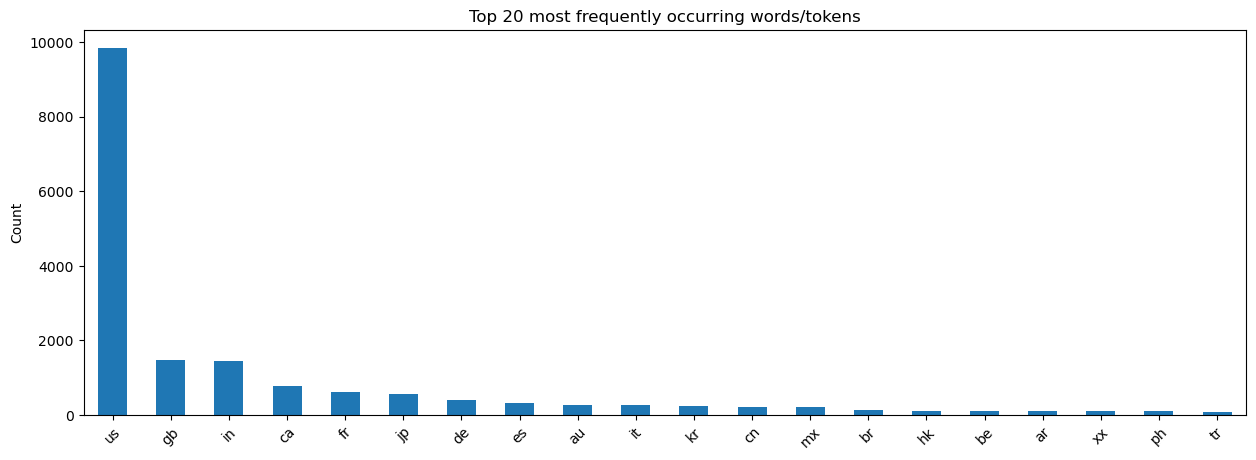

In [167]:
plot_top_words(countries_transformed, bagofwords)

In [168]:
column_names = [f'prod_country_{name}' for name in bagofwords.get_feature_names_out()] #To start all column names with genre_

countries_vectorized = pd.DataFrame(columns=column_names, data=countries_transformed.toarray())
countries_vectorized.head()

,prod_country_ae,prod_country_af,prod_country_al,prod_country_am,prod_country_america,prod_country_an,prod_country_ao,prod_country_aq,prod_country_ar,prod_country_at,...,prod_country_va,prod_country_ve,prod_country_vn,prod_country_xc,prod_country_xg,prod_country_xk,prod_country_xx,prod_country_yu,prod_country_za,prod_country_zw
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
countries_transformed

<16840x148 sparse matrix of type '<class 'numpy.int64'>'
	with 19149 stored elements in Compressed Sparse Row format>

In [170]:
word_counts = pd.DataFrame(
    {"counts": countries_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(50)

,counts
us,9827
gb,1483
in,1442
ca,780
fr,622
jp,556
de,397
es,333
au,275
it,273


There are too many countries here that are not showing up with high frequency, meaning there are hardly any titles that have these as their production countries. I'm going to cap it off at 35, so I'm going to re-run the count vectorizer with a min_df of 35. What this will do is only count those countries in which a minimum of 35 titles have been created.

In [171]:
# 1. Instantiate 
bagofwords = CountVectorizer(min_df=35)

# 2. Fit 
bagofwords.fit(production_countries['production_countries'])

# 3. Transform
countries_transformed = bagofwords.transform(production_countries['production_countries'])
countries_transformed


<16840x39 sparse matrix of type '<class 'numpy.int64'>'
	with 18513 stored elements in Compressed Sparse Row format>

In [172]:
#Creating the data frame for the description vectorized

column_names = [f'prod_country_{name}' for name in bagofwords.get_feature_names_out()] #To start all column names with title_

prod_country_vectorized = pd.DataFrame(columns=column_names, data=countries_transformed.toarray())
prod_country_vectorized.head()

,prod_country_ar,prod_country_au,prod_country_be,prod_country_br,prod_country_ca,prod_country_ch,prod_country_cl,prod_country_cn,prod_country_co,prod_country_cz,...,prod_country_ph,prod_country_pl,prod_country_ru,prod_country_se,prod_country_th,prod_country_tr,prod_country_tw,prod_country_us,prod_country_xx,prod_country_za
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3

## Joining the datasets and saving processed dataframe for modeling

### Adding `Description`

In [173]:
all_titles_processed = pd.concat([all_titles_processed, \
                                  description_vectorized, description_vectorized_2], axis=1)

In [174]:
all_titles_processed.isna().sum().sum()

0

In [175]:
all_titles_processed.shape

(16840, 577)

### Adding `Genres`

In [176]:
all_titles_processed = pd.concat([all_titles_processed, \
                                  genres_vectorized], axis=1)

In [177]:
all_titles_processed.isna().sum().sum()

0

### Adding `Production Country`

In [178]:
all_titles_processed = pd.concat([all_titles_processed, \
                                  prod_country_vectorized], axis=1)

In [179]:
all_titles_processed.isna().sum().sum()

0

### Adding `Titles`

In [180]:
all_titles_processed = pd.concat([all_titles_processed, \
                                  titles_vectorized], axis=1)

In [181]:
all_titles_processed.shape

(16840, 795)

In [182]:
all_titles_processed.isna().sum().sum()

0

In [183]:
pd.set_option('display.max_columns', None)

In [184]:
all_titles_processed.head(5)

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,platform,Superstars,Allstars,Supporting_Actors,Other_Actors,oscar_acting,oscar_directing,oscar_directing_nominee,emmy_acting,description_accident,description_action,description_adventure,description_adventures,description_age,description_agent,description_ago,description_america,description_american,description_angeles,description_army,description_arrives,description_attempt,description_attempts,description_away,description_bad,description_band,description_based,description_battle,description_beautiful,description_begin,description_begins,description_best,description_big,description_black,description_body,description_book,description_boss,description_boy,description_boyfriend,description_break,description_bring,description_brings,description_british,description_brother,description_brothers,description_business,description_called,description_car,description_career,description_case,description_caught,description_century,description_challenges,description_chance,description_change,description_characters,description_child,description_childhood,description_children,description_christmas,description_city,description_class,description_close,description_college,description_come,description_comedian,description_comedy,description_comes,description_comic,description_community,description_company,description_control,description_cop,description_country,description_couple,description_course,description_crew,description_crime,description_criminal,description_dangerous,description_dark,description_daughter,description_day,description_days,description_dead,description_deadly,description_deal,description_death,description_decide,description_decides,description_desperate,description_despite,description_detective,description_determined,description_different,description_director,description_discover,description_discovers,description_doctor,description_documentary,description_does,description_doesn,description_dog,description_don,description_dr,description_drama,description_dream,description_dreams,description_drug,description_early,description_earth,description_end,description_ends,description_escape,description_events,description_evil,description_ex,description_explores,description_face,description_fall,description_falls,description_family,description_famous,description_far,description_father,description_female,description_fight,description_film,description_finally,description_finds,description_follow,description_following,description_follows,description_force,description_forced,description_forces,description_forever,description_free,description_friend,description_friends,description_friendship,description_fun,description_future,description_game,description_gang,description_gets,description_getting,description_girl,description_girlfriend,description_girls,description_goes,description_going,description_good,description_government,description_great,description_group,description_hard,description_having,description_head,description_heart,description_help,description_hero,description_high,description_hilarious,description_history,description_hit,description_home,description_hope,description_house,description_human,description_husband,description_identity,description_including,description_inside,description_inspired,description_investigate,description_involved,description_island,description_jack,description_job,description_john,description_join,description_journey,description_just,description_justice,description_kids,description_kill,description_killed,description_killer,description_killing,description_king,description_know,description_known,description_land,description_late,description_later,description_law,description_lead,description_leader,description_leads,description_learn,description_learns,description_leave,description_leaves,description_led,description_left,description_legendary,description_life,description_like,description_little

### Dropping unrequired columns

In [185]:
all_titles_processed.drop(columns= ['id','title','genres',\
                                               'description','production_countries',\
                                    'imdb_id','platform'],inplace=True)

In [186]:
all_titles_processed.head()

,type,release_year,runtime,seasons,imdb_score,imdb_votes,Superstars,Allstars,Supporting_Actors,Other_Actors,oscar_acting,oscar_directing,oscar_directing_nominee,emmy_acting,description_accident,description_action,description_adventure,description_adventures,description_age,description_agent,description_ago,description_america,description_american,description_angeles,description_army,description_arrives,description_attempt,description_attempts,description_away,description_bad,description_band,description_based,description_battle,description_beautiful,description_begin,description_begins,description_best,description_big,description_black,description_body,description_book,description_boss,description_boy,description_boyfriend,description_break,description_bring,description_brings,description_british,description_brother,description_brothers,description_business,description_called,description_car,description_career,description_case,description_caught,description_century,description_challenges,description_chance,description_change,description_characters,description_child,description_childhood,description_children,description_christmas,description_city,description_class,description_close,description_college,description_come,description_comedian,description_comedy,description_comes,description_comic,description_community,description_company,description_control,description_cop,description_country,description_couple,description_course,description_crew,description_crime,description_criminal,description_dangerous,description_dark,description_daughter,description_day,description_days,description_dead,description_deadly,description_deal,description_death,description_decide,description_decides,description_desperate,description_despite,description_detective,description_determined,description_different,description_director,description_discover,description_discovers,description_doctor,description_documentary,description_does,description_doesn,description_dog,description_don,description_dr,description_drama,description_dream,description_dreams,description_drug,description_early,description_earth,description_end,description_ends,description_escape,description_events,description_evil,description_ex,description_explores,description_face,description_fall,description_falls,description_family,description_famous,description_far,description_father,description_female,description_fight,description_film,description_finally,description_finds,description_follow,description_following,description_follows,description_force,description_forced,description_forces,description_forever,description_free,description_friend,description_friends,description_friendship,description_fun,description_future,description_game,description_gang,description_gets,description_getting,description_girl,description_girlfriend,description_girls,description_goes,description_going,description_good,description_government,description_great,description_group,description_hard,description_having,description_head,description_heart,description_help,description_hero,description_high,description_hilarious,description_history,description_hit,description_home,description_hope,description_house,description_human,description_husband,description_identity,description_including,description_inside,description_inspired,description_investigate,description_involved,description_island,description_jack,description_job,description_john,description_join,description_journey,description_just,description_justice,description_kids,description_kill,description_killed,description_killer,description_killing,description_king,description_know,description_known,description_land,description_late,description_later,description_law,description_lead,description_leader,description_leads,description_learn,description_learns,description_leave,description_leaves,description_led,description_left,description_legendary,description_life,description_like,description_little,description_live,description_lives,description_living,description

In [187]:
all_titles_processed.isna().sum().sum()

0

And finally, saving it as a csv file for modeling.

In [188]:
all_titles_processed.to_csv('data/ready_for_modeling.csv', index=False)

### Conclusion_

In this notebook, we've completed the initial process of cleaning, EDA as well as feature engineering. In the next notebook we're going to add in some supplementary data which is awards information, and then finally get into modeling.